In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch

from nn import NeuralNetwork
from hedger import Hedger
from instruments import BrownianStock, EuropeanOption, LookbackOption
from finance import pl

tensor(0.0742, grad_fn=<NegBackward0>)
tensor(0.1005, grad_fn=<NegBackward0>)
tensor(0.1044, grad_fn=<NegBackward0>)
tensor(0.0992, grad_fn=<NegBackward0>)
tensor(0.0892, grad_fn=<NegBackward0>)
tensor(0.0894, grad_fn=<NegBackward0>)
tensor(0.0397, grad_fn=<NegBackward0>)
tensor(0.0341, grad_fn=<NegBackward0>)
tensor(0.0291, grad_fn=<NegBackward0>)
tensor(0.0405, grad_fn=<NegBackward0>)


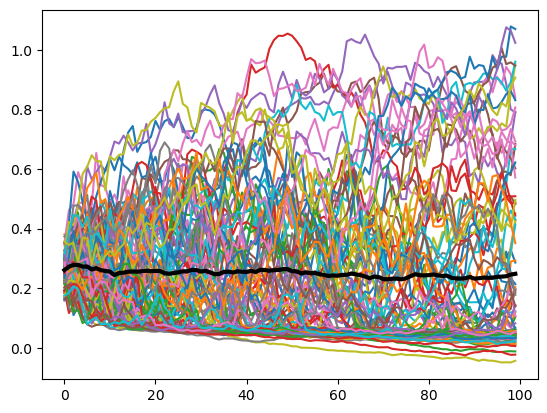

In [19]:
# Training params
n_paths = 50
n_epochs = 100

# Network params
n_features = 3
n_outputs = 1

# Instrument params
mu = 0.0
sigma = 0.2
features = ['time',
            'log_moneyness',
            'volatility']

# Derivative params
call = True
short = True
strike = 1.1
maturity = 100/250

model = NeuralNetwork(n_features, n_outputs)
underlier = BrownianStock(mu, sigma)
derivative = EuropeanOption(underlier, call=call, short=short, strike=strike, maturity=maturity)
hedger = Hedger(model, underlier, derivative)
history = hedger.fit(features=features, n_epochs=n_epochs, n_paths=n_paths)

derivative.simulate(100)
input = derivative.reformat(features)
output = torch.squeeze(hedger.model(input), dim=-1).detach().numpy()
predictions = output

for prediction in predictions:
    plt.plot(prediction)
plt.plot(np.mean(predictions, axis=0), c='k', lw=3)
plt.show()
